<a href="https://colab.research.google.com/github/CarlosCaosta/Data_Science/blob/main/San_Francisco_CA_Analisando_dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

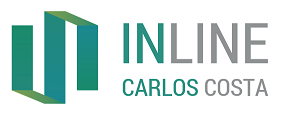



#### **Data Science na Prática 3.0**
*by [Inline_Projetos](https://www.inlineprojetos.com)*

---

# Análise dos Dados do Airbnb - *San Francisco - CA*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade SAN FRANCISCO, extraida no dia 08:00 17/08/2022  e ver quais insights podem ser extraídos a partir de dados brutos.**

San Francisco, oficialmente Cidade e Condadod de São Francisco é a quarta maior cidade mais populosa do estado da Califonia e a decima sétima mais populosa dos Estados Unidos, com uma população de 873 mil habitantes.

O Turismo é uma das maiores industrias do setor privado da cidade, responsável por mais de um em cada sete postos de trabalho na cidade. A frequente representação da cidade na música, no cinema e na cultura popular tornam São Francisco e seus pontos de referência reconhecidos em todos o mundo.

No roteiro turistico podemos destacar: Pier 35, Golden Gate, Alcatraz, Lombard Street e Palace of Fine Arts.

## Obtenção dos Dados

In [1]:
import pandas as pd                 
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import pandas as pd 
import io 

%matplotlib inline

In [2]:
uploaded = files.upload()

Saving Db_Airbnb_SanFrancisco.csv to Db_Airbnb_SanFrancisco.csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['Db_Airbnb_SanFrancisco.csv'])) 

In [4]:
# Obtendo o nome das colunas existente no dataframe
df.columns.values.tolist()

['id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365',
 'number_of_reviews_ltm',
 'license']

## Análise dos Dados

Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.

**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [5]:
# mostrar as 3 primeiras entradas
df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,958,"Bright, Modern Garden Unit - 1BR/1BTH",1169,Holly,NaN,Western Addition,37.77028,-122.43317,Entire home/apt,180,2,358,2022-08-21,2.24,1,140,60,City Registration Pending
1,5858,Creative Sanctuary,8904,Philip And Tania,NaN,Bernal Heights,37.74474,-122.42089,Entire home/apt,235,30,111,2017-08-06,0.68,1,365,0,NaN
2,8014,room in FEMALE house WIFI market nearby,22402,Jia,NaN,Outer Mission,37.73077,-122.44827,Private room,61,2,86,2022-09-04,0.70,3,5,1,STR-0000974


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [6]:
# identificar o volume de dados do DataFrame
print("Entradas: {} e Variáveis: {}\n".format(df.shape[0],df.shape[1]))
# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas: 6629 e Variáveis: 18



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [12]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
license                           0.420124
reviews_per_month                 0.166994
last_review                       0.166994
host_name                         0.001810
minimum_nights                    0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
id                                0.000000
name                              0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Para identificar a distribuição das variáveis, irei plotar o histograma.

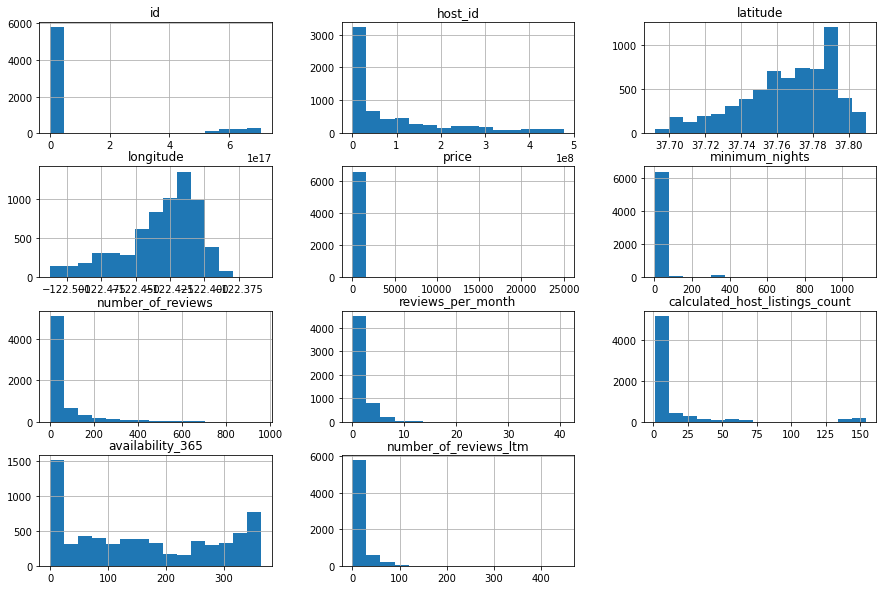

In [37]:
# plotar o histograma das variáveis numéricas
df = df.drop(columns=['neighbourhood_group'])
df.hist(bins=15, figsize=(15,10));

### **Q4a. Limpando os dados**

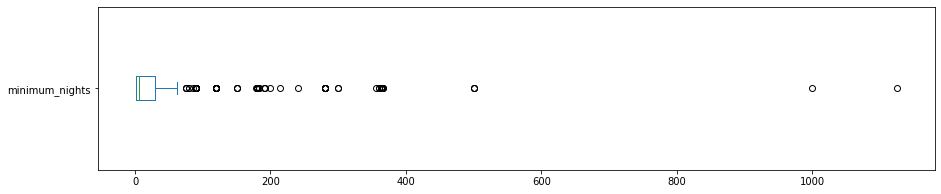

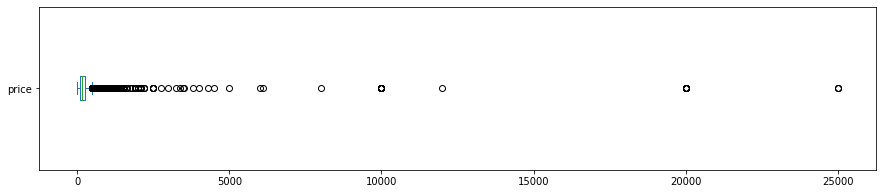

A quantidade de minimum_nights com valores acima de 30 é de 558, o que representa 8.4176% da amostra.
A quantidade de price com valores acima de 1500 é de 76, o que respresenta 1.1465% da amostra.

price: valores acima de 1500
76 entradas
1.1465%


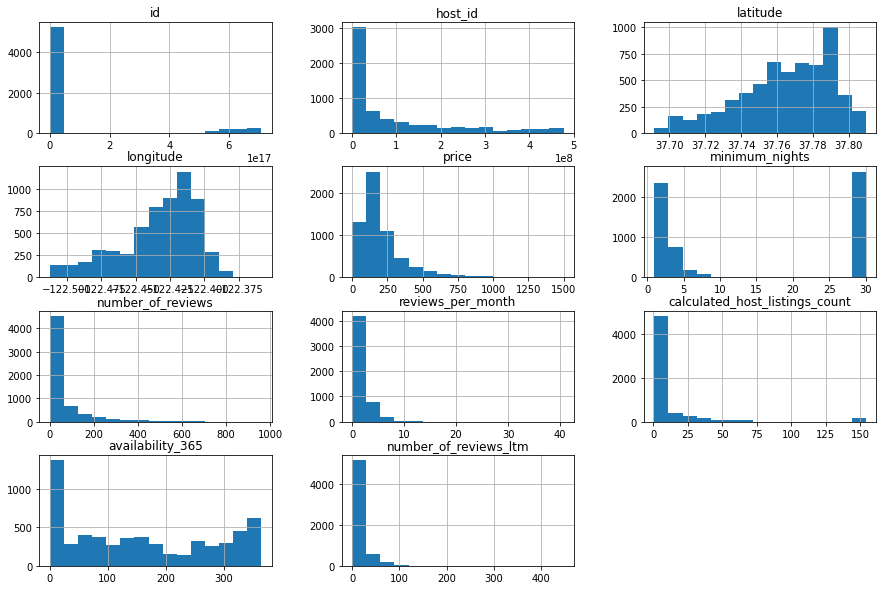

In [46]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

print("A quantidade de minimum_nights com valores acima de 30 é de {}, o que representa {:.4f}% da amostra.".format(len(df[df.minimum_nights > 30]),(len(df[df.minimum_nights > 30]) / df.shape[0])*100))
print("A quantidade de price com valores acima de 1500 é de {}, o que respresenta {:.4f}% da amostra.".format(len(df[df.price > 1500]),((len(df[df.price > 1500]) / df.shape[0])*100)))

# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **Q4b. Qual a média dos preços de aluguel?**

In [24]:
# ver a média da coluna `price``
priceall = df.price.mean()
princeclean = df_clean.price.mean()
print("A média de preço para o db origienal é de: {} e removendo outliers a média de preço é: {}\n".format(priceall,princeclean))

A média de preço para o db origienal é de: 303.46477598431136 e removendo outliers a média de preço é: 213.87604131956016



### **Q5. Qual a correlação existente entre as variáveis**

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.224656,-0.090255,-0.057902,-0.159449,-0.058032
minimum_nights,-0.224656,1.000000,-0.317179,-0.397524,0.106084,0.217082
number_of_reviews,-0.090255,-0.317179,1.000000,0.580075,-0.143483,-0.017377
reviews_per_month,-0.057902,-0.397524,0.580075,1.000000,-0.162346,0.011923
calculated_host_listings_count,-0.159449,0.106084,-0.143483,-0.162346,1.000000,-0.011439
availability_365,-0.058032,0.217082,-0.017377,0.011923,-0.011439,1.000000


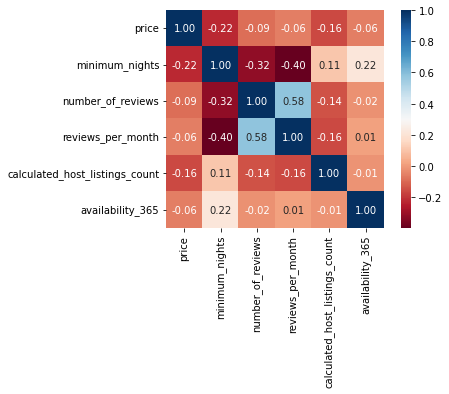

In [25]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q6. Qual o tipo de imóvel mais alugado no Airbnb?**

In [26]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    3852
Private room       2006
Shared room          79
Hotel room           65
Name: room_type, dtype: int64

In [27]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.641786
Private room       0.334222
Shared room        0.013162
Hotel room         0.010830
Name: room_type, dtype: float64

### **Q7. Qual a localidade mais cara do dataset?**

In [29]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)

neighbourhood
Russian Hill             338.578947
Presidio                 337.125000
Diamond Heights          334.083333
North Beach              316.476190
Twin Peaks               315.380952
Marina                   291.848315
Castro/Upper Market      271.802419
Pacific Heights          269.394161
Seacliff                 267.000000
Glen Park                262.528302
Potrero Hill             259.854962
Presidio Heights         251.120000
Noe Valley               248.412322
Chinatown                236.642105
Western Addition         231.197368
Inner Richmond           230.082353
Financial District       228.500000
Haight Ashbury           225.957692
Nob Hill                 221.171548
Bernal Heights           216.796296
Outer Richmond           208.310976
South of Market          206.767081
Inner Sunset             205.773723
Mission                  193.319231
West of Twin Peaks       187.771739
Downtown/Civic Center    185.399135
Outer Mission            180.041958
Crocker Amazon

In [33]:
df_clean.groupby(['neighbourhood']).number_of_reviews.sum().sort_values(ascending=False)

neighbourhood
Outer Sunset             25619
Mission                  25227
Castro/Upper Market      19709
Western Addition         19644
Bernal Heights           19565
Haight Ashbury           15389
Downtown/Civic Center    14862
Outer Richmond           13605
Potrero Hill             12348
Noe Valley               12210
Inner Richmond           11535
Ocean View               10294
Marina                    9202
South of Market           9138
Lakeshore                 8857
West of Twin Peaks        8734
Outer Mission             8635
Parkside                  8618
Excelsior                 8521
Inner Sunset              7048
Pacific Heights           6755
Bayview                   6331
Crocker Amazon            5866
Visitacion Valley         5767
Russian Hill              5414
Financial District        5372
North Beach               4411
Nob Hill                  4314
Twin Peaks                2997
Glen Park                 2874
Chinatown                 2488
Diamond Heights          

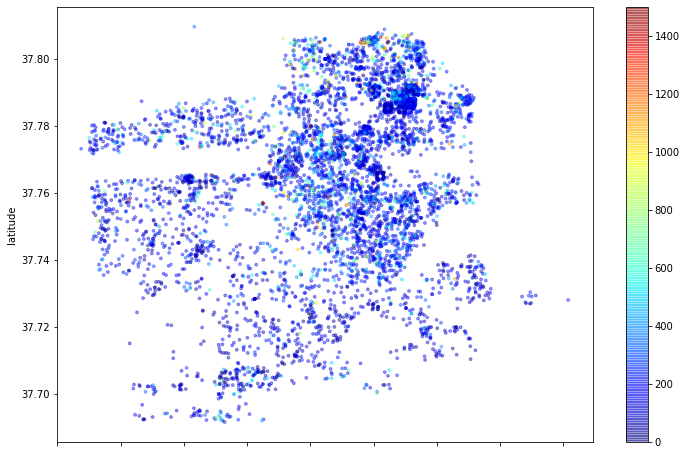

In [34]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [35]:
df_clean.groupby(['neighbourhood']).minimum_nights.mean().sort_values(ascending=False)

neighbourhood
South of Market          20.288820
Mission                  19.628846
Presidio                 19.625000
North Beach              19.515873
Pacific Heights          19.000000
Russian Hill             18.218045
Marina                   18.213483
Inner Sunset             18.189781
Presidio Heights         17.840000
Western Addition         17.328947
Noe Valley               16.644550
Nob Hill                 15.815900
Haight Ashbury           15.730769
Bayview                  15.450704
Inner Richmond           15.082353
Castro/Upper Market      14.540323
Diamond Heights          14.333333
Financial District       13.833333
Potrero Hill             13.503817
Bernal Heights           13.259259
Glen Park                12.660377
Twin Peaks               12.452381
Outer Richmond           12.408537
Excelsior                11.977273
Outer Sunset             11.767528
Ocean View               11.600000
Parkside                 11.382114
Seacliff                 11.166667
Crocke

### **Q8. Conclusões**

A análise exploratório de dados foi realizada a partir da base de dados do Airbnb da cidade de São Francisco, Califórnia e foi utilizando os recursos da biblioteca PANDAS para a análise dos dados.

A criação de um dicionário de variáveis foi primordial para a compreensão dos dados. Com o objetivo de garantir a qualidade da base de dados algumas premissas foram adotadas:

1.	A coluna neighbourhood_group estava sem dados, por isso será removida;
2.	Os valores minimum_nights com valores superior a 30 dias serão desconsiderados;
3.	Os valores superior a 1500 da coluna price serão excluídos.

Aplicando as premissas acima, obteve-se dois bancos de dados, o banco original e o banco de dados tratado. Com o intuito de fazer uma comparação entre a média da coluna price de ambos os bancos foi identificado uma redução de 30% no valor médio após a limpeza dos dados.
Com foco apenas no banco de dados limpo, podemos concluir que existe uma baixa correlação entre as variáveis, a maioria das locações foram do tipo Entire home/apt, o que representou 64% das locações e que analisando por neighbourhood, média do minimum_nights, existe uma grande diferença entre o número mínimo de noites, sendo o menor número de minimum_nights representa aproximadamente 10% da maior quantidade de minimum_nights contida na base de dados.
